### Per Dr. Priestley's class STAT8330: Data - there are two sets of files here: 
* CLEAN and NOT CLEAN.

* The NOT CLEAN files are raw and have all of the coded values and the CLEAN files have the coded values imputed with the median.
#### All files can be merged on Matchkey.

In [4]:
import matplotlib.pyplot as plt
import numpy as np #library for math operations
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

In [5]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
Pandas version 0.23.3
Matplotlib version 2.2.2
Numpy version 1.15.0


# Get Data 
Location file is used the URL, from pandas version 0.19.2 the URL can be directly passed and if is used the local source the read can be perfomed as: 
Location = r'C:\Users\sb0709\bootcamp_KSU\blob\master\Data\CLEAN1A.csv' # r is required so can read the slashes and is a standard in python with the strings read. 

### Tutorial source http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb

In [59]:
# Pull the data from remote location: here is my github "Data" folder
# Note: if you read the http files than read the file content and not the html because you'll get issue and not knowing where comes from.
# docs source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

url_CLEAN1A = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/CLEAN1A.csv"
url_CLEAN1B = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/CLEAN1B.csv"
url_CLEAN1C = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/CLEAN1C.csv"


In [60]:
# Create dataframe from the .csv files or simply read in csv files. 

df_CLEAN1A = pd.read_csv(url_CLEAN1A,sep=',')
df_CLEAN1B = pd.read_csv(url_CLEAN1B,sep=',')
df_CLEAN1C = pd.read_csv(url_CLEAN1C,sep=',')

In [61]:
df_CLEAN1A.head(5)

,MATCHKEY,RBAL,TRADES,AGE
0,16345246,1492,4,39
1,13728016,0,3,71
2,14716776,854,9,30
3,14568809,408,13,28
4,13513749,4965,41,51


In [62]:
df_CLEAN1B.head(5)

,MATCHKEY,DELQID,CRELIM,goodbad
0,16345246,1,750,0
1,13728016,0,3250,0
2,14716776,4,500,1
3,14568809,1,3000,0
4,13513749,0,500,0


In [154]:
df_CLEAN1C.head()

,MATCHKEY,BRNEW,BRAGE
0,16345246,5,20
1,13728016,19,19
2,14716776,0,46
3,14568809,2,33
4,13513749,3,68


In [155]:
df_CLEAN1A.tail()

,MATCHKEY,RBAL,TRADES,AGE
995,4658661,18203,28,66
996,14525676,6978,31,45
997,14552548,24043,34,47
998,3267611,18108,30,58
999,3380958,10793,29,67


## Check the data for missing values

In [76]:
# sum() is ussed to get the total of each value missing per collumn.

print("Print content for df_CLEAN1A:",'\n', df_CLEAN1A.isnull().sum()) 
print('\n')
print("Print content for df_CLEAN1B:",'\n', df_CLEAN1B.isnull().sum())
print('\n')
print("Print content for df_CLEAN1C:",'\n', df_CLEAN1C.isnull().sum())

Print content for df_CLEAN1A: 
 MATCHKEY    0
RBAL        0
TRADES      0
AGE         0
dtype: int64


Print content for df_CLEAN1B: 
 MATCHKEY    0
DELQID      0
CRELIM      0
goodbad     0
dtype: int64


Print content for df_CLEAN1C: 
 MATCHKEY    0
BRNEW       0
BRAGE       0
dtype: int64


# Cleaning / filling missing data

In [78]:
url_NOTCLEAN1A = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/NOTCLEAN1A.csv"
df_NOTCLEAN1A = pd.read_csv(url_NOTCLEAN1A,sep=',')

In [80]:
# check the structure of the dataframe

df_NOTCLEAN1A.shape

(1000, 4)

In [81]:
# Filling missing values with function: fillna() 

In [82]:
df_NOTCLEAN1A.isnull().sum()

MATCHKEY      0
AGE         213
TRADES      213
RBAL        213
dtype: int64

In [86]:
df_NOTCLEAN1A['AGE'].head(25)

0     40.0
1     62.0
2     43.0
3     60.0
4     43.0
5     44.0
6     75.0
7     50.0
8     87.0
9     30.0
10    54.0
11    48.0
12    77.0
13    43.0
14    57.0
15    41.0
16    41.0
17    43.0
18     NaN
19    49.0
20     NaN
21    75.0
22     NaN
23     NaN
24    59.0
Name: AGE, dtype: float64

In [87]:
df_NOTCLEAN1A.head(25)

,MATCHKEY,AGE,TRADES,RBAL
0,1385102,40.0,15.0,0.0
1,1390425,62.0,23.0,25946.0
2,1439834,43.0,32.0,8318.0
3,1442215,60.0,39.0,38094.0
4,1570044,43.0,23.0,33500.0
5,1587999,44.0,4.0,6359.0
6,1601066,75.0,22.0,1431.0
7,1613198,50.0,11.0,16152.0
8,1619718,87.0,13.0,2898.0
9,1656439,30.0,16.0,259.0


In [93]:
# fill with media or mean example so can match the orginal cleaned data. 

df_imputed_median_NOTCLEAN1A = df_NOTCLEAN1A.fillna(df_NOTCLEAN1A.median())

In [136]:
df_imputed_median_NOTCLEAN1A.head(25)

,MATCHKEY,AGE,TRADES,RBAL
0,1385102,40.0,15.0,0.0
1,1390425,62.0,23.0,25946.0
2,1439834,43.0,32.0,8318.0
3,1442215,60.0,39.0,38094.0
4,1570044,43.0,23.0,33500.0
5,1587999,44.0,4.0,6359.0
6,1601066,75.0,22.0,1431.0
7,1613198,50.0,11.0,16152.0
8,1619718,87.0,13.0,2898.0
9,1656439,30.0,16.0,259.0


In [137]:
# impute with the mean 

df_imputed_mean_NOTCLEAN1A = df_NOTCLEAN1A.fillna(df_NOTCLEAN1A.mean())

In [138]:
df_imputed_mean_NOTCLEAN1A.head(25)

,MATCHKEY,AGE,TRADES,RBAL
0,1385102,40.000000,15.000000,0.000000
1,1390425,62.000000,23.000000,25946.000000
2,1439834,43.000000,32.000000,8318.000000
3,1442215,60.000000,39.000000,38094.000000
4,1570044,43.000000,23.000000,33500.000000
5,1587999,44.000000,4.000000,6359.000000
6,1601066,75.000000,22.000000,1431.000000
7,1613198,50.000000,11.000000,16152.000000
8,1619718,87.000000,13.000000,2898.000000
9,1656439,30.000000,16.000000,259.000000


# Working with dates sample:

source documentation: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [142]:
df2 = df_imputed_mean_NOTCLEAN1A.copy()

In [143]:
# create the column timestamp with Hours for our dataframe

df2['timestamp'] = pd.date_range('8/8/2018', periods=len(df2['MATCHKEY']), freq='D')

In [144]:
df2.head(5)

,MATCHKEY,AGE,TRADES,RBAL,timestamp
0,1385102,40.0,15.0,0.0,2018-08-08
1,1390425,62.0,23.0,25946.0,2018-08-09
2,1439834,43.0,32.0,8318.0,2018-08-10
3,1442215,60.0,39.0,38094.0,2018-08-11
4,1570044,43.0,23.0,33500.0,2018-08-12


In [149]:
# Converting to Timestamps

df2['timestamp'] = pd.to_datetime(df2['timestamp'], format='%d/%b/%Y:%H:%M:%S +0000', utc=True)

In [150]:
df2.head(5)

,MATCHKEY,AGE,TRADES,RBAL,timestamp
0,1385102,40.0,15.0,0.0,2018-08-08 00:00:00+00:00
1,1390425,62.0,23.0,25946.0,2018-08-09 00:00:00+00:00
2,1439834,43.0,32.0,8318.0,2018-08-10 00:00:00+00:00
3,1442215,60.0,39.0,38094.0,2018-08-11 00:00:00+00:00
4,1570044,43.0,23.0,33500.0,2018-08-12 00:00:00+00:00


# Simple data analysis

In [153]:
df_CLEAN1A.info()

# provides info related to the dataframe df_CLEAN1A as follow: 1k observations, each column has datatype of numeric(int64) and also how much memory is using in our machine. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
MATCHKEY    1000 non-null int64
RBAL        1000 non-null int64
TRADES      1000 non-null int64
AGE         1000 non-null int64
dtypes: int64(4)
memory usage: 31.3 KB


# Check the max() AGE value in our dataset and also the min()

In [199]:
# The eldery person in our dataset is 92

df_CLEAN1A['AGE'].max()

92

In [200]:
# The youngest person in our dataset is 92

df_CLEAN1A['AGE'].min()

19

In [209]:
# create the categories using cut with argument bins
labels = ['AG_0_30','AG_30_50','AG_50_70','AG_70_UP']
df_CLEAN1A['AGE_groups'] = pd.cut(df_CLEAN1A['AGE'], bins=[0, 30, 50, 70, 100], labels=labels)

#df_CLEAN1A['AGE_groups'] = pd.cut(df_CLEAN1A['AGE'], bins=[0, 30, 50, 70, 100], labels=False)
#labels = np.array('[1,2,3,4,5,6]'.split())
#df_CLEAN1A['AGE_groups'] = labels[df_CLEAN1A['AGE_groups']]

In [210]:
df_CLEAN1A.head()

,MATCHKEY,RBAL,TRADES,AGE,AGE_groups
0,16345246,1492,4,39,AG_30_50
1,13728016,0,3,71,AG_70_UP
2,14716776,854,9,30,AG_0_30
3,14568809,408,13,28,AG_0_30
4,13513749,4965,41,51,AG_50_70


In [211]:
# convert to categorical the AGE_groups collumn.

df_CLEAN1A['AGE_groups'] = df_CLEAN1A['AGE_groups'].astype('category')

In [212]:
df_CLEAN1A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
MATCHKEY      1000 non-null int64
RBAL          1000 non-null int64
TRADES        1000 non-null int64
AGE           1000 non-null int64
AGE_groups    1000 non-null category
dtypes: category(1), int64(4)
memory usage: 32.5 KB


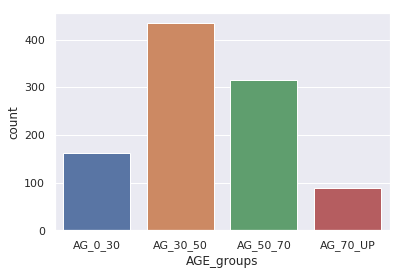

In [214]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="AGE_groups", data=df_CLEAN1A)

#doc source https://seaborn.pydata.org/generated/seaborn.countplot.html

# Merge, join, and concatenate
### Join dataframes in 1 single dataframe by MATCHKEY
###### doc source: https://pandas.pydata.org/pandas-docs/stable/merging.html


### My prefered option if Database-style DataFrame joining/merging because as Data Scientist/Data Engineer we work with multiple sources and one comun and widelly used is the databases(any SQL, noSQL and even SAS has Proc SQL for working is data so is cross platform the "Concept").


Users who are familiar with SQL but new to pandas might be interested in a comparison with SQL.

pandas provides a single function, merge(), as the entry point for all standard database join operations between DataFrame objects:

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```


![alt text](https://github.com/sb0709/bootcamp_KSU/blob/master/pictures/merge_methods.png?raw=true?raw=true)

### Example for merge/join 2 dataframes as per documentation.
```python
data = pd.merge(df_CLEAN1A, df_CLEAN1B on='MATCHKEY', how='inner', indicator='indicator_column')
```

In [226]:
# in our case we have more than 2 dataframes so the following code will merge more than 
from functools import reduce

dfs = [df_CLEAN1A, df_CLEAN1B, df_CLEAN1C] # lift of the dataframes
data = reduce(lambda left,right: pd.merge(left,right,on='MATCHKEY', how='inner'), dfs)


In [227]:
# content of the merge of 3 dataframes

data.head()


,MATCHKEY,RBAL,TRADES,AGE,AGE_groups,DELQID,CRELIM,goodbad,BRNEW,BRAGE
0,16345246,1492,4,39,AG_30_50,1,750,0,5,20
1,13728016,0,3,71,AG_70_UP,0,3250,0,19,19
2,14716776,854,9,30,AG_0_30,4,500,1,0,46
3,14568809,408,13,28,AG_0_30,1,3000,0,2,33
4,13513749,4965,41,51,AG_50_70,0,500,0,3,68


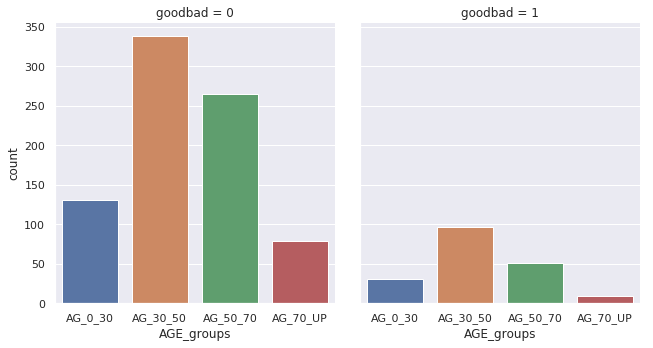

In [228]:
# Use catplot() to combine a countplot() and a FaceGrid()

g = sns.catplot(x="AGE_groups", col="goodbad",
                 data=data, kind="count",
                 height=5, aspect=.9);

# Filtering, Sorting and groupBy

In [230]:
# Select observations where the AGE is greater than 70
age_up70 = data[data['AGE'] > 70]

In [231]:
age_up70.head()

,MATCHKEY,RBAL,TRADES,AGE,AGE_groups,DELQID,CRELIM,goodbad,BRNEW,BRAGE
1,13728016,0,3,71,AG_70_UP,0,3250,0,19,19
10,4508533,0,10,88,AG_70_UP,0,2000,0,62,112
16,10174386,3416,39,72,AG_70_UP,0,3750,0,29,126
19,10080303,153,19,81,AG_70_UP,0,2000,0,28,181
20,11551471,3115,27,88,AG_70_UP,0,2250,0,25,177


In [233]:
#checking the shape of the age_up70 dataframe

age_up70.shape

(88, 10)

In [246]:
# slicing the columns of the dataframe data
sl_data = data[['goodbad','TRADES',  'AGE_groups']]

In [247]:
print("The shape of the dataframe is:", sl_data.shape)
print()
print("Print the head of the new created dataframe:", '\n', sl_data.head())

The shape of the dataframe is: (1000, 3)

Print the head of the new created dataframe: 
    goodbad  TRADES AGE_groups
0        0       4   AG_30_50
1        0       3   AG_70_UP
2        1       9    AG_0_30
3        0      13    AG_0_30
4        0      41   AG_50_70


### Grouping the data (using columns and applying functions like mean, sum, count)

##### pandas.DataFrame.groupby 

```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
```

##### doc source https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [256]:
# groupBy function usage with the columns we group to become as the index.

g_goodbad_index = sl_data.groupby(['goodbad','AGE_groups']).sum()
g_goodbad_index

TRADES
goodbad AGE_groups        
0       AG_0_30       1864
        AG_30_50      6379
        AG_50_70      5745
        AG_70_UP      1508
1       AG_0_30        367
        AG_30_50      1939
        AG_50_70      1145
        AG_70_UP       236

In [257]:
# groupBy function usage if you want to not have the columns you are groupBy to become the index.

g_goodbad_not_index = sl_data.groupby(['goodbad','AGE_groups'], as_index=False).sum()
g_goodbad_not_index

,goodbad,AGE_groups,TRADES
0,0,AG_0_30,1864
1,0,AG_30_50,6379
2,0,AG_50_70,5745
3,0,AG_70_UP,1508
4,1,AG_0_30,367
5,1,AG_30_50,1939
6,1,AG_50_70,1145
7,1,AG_70_UP,236


In [260]:
!pwd #location of the current working directory. 

# path for writing to csv the merged dataset: /home/sb0709/github_repos/bootcamp_ksu/

/home/sb0709/github_repos/bootcamp_ksu/notebooks


# Write the dataframe to csv file function pandas: pandas.DataFrame.to_csv

```python
DataFrame.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

Write DataFrame to a comma-separated values (csv) file
```


In [264]:
data.to_csv('/home/sb0709/github_repos/bootcamp_ksu/Data/data.csv', sep = ',')

# Summary and Q&A